In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
df = pd.read_csv("/content/heart_disease_data.csv")

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
df.shape

(303, 14)

In [ ]:
df['target'].value_counts()

,count
target,
1,165
0,138


In [ ]:
df.nunique()

,0
age,41
sex,2
cp,4
trestbps,49
chol,152
fbs,2
restecg,3
thalach,91
exang,2
oldpeak,40


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
import seaborn as sns

<Axes: >

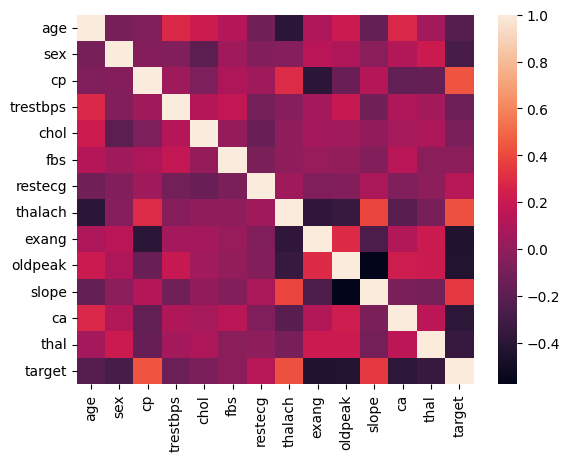

In [ ]:
sns.heatmap(df.corr())

In [ ]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


In [ ]:
df['target'].value_counts()

,count
target,
1,165
0,138


In [ ]:
# separating the data label
x = df.drop(columns= 'target',axis=1)
y = df['target']

1 --> Defective Heart

0 --> Healthy Heart

In [ ]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [ ]:
y

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


# Scaling

In [ ]:
scaler = StandardScaler()
scaler.fit(x)

StandardScaler()

In [ ]:
scaled_data = scaler.transform(x)
scaled_data

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

In [ ]:
x = scaled_data
y = df['target']

Train Test Split

In [ ]:
#splitting the data into training and test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(303, 13) (242, 13) (61, 13)


# Training the model

In [ ]:
models = {
    "RandomForest" : RandomForestClassifier(random_state=2),
    "SVC":SVC(probability=True,random_state=2),
    'LogisticRegression': LogisticRegression(random_state=2, max_iter=1000),
    'GradientBoosting': GradientBoostingClassifier(random_state=2),
    'svm.svc': svm.SVC(kernel='linear')

}

In [ ]:
param_grids = {
    'RandomForest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'SVC': {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
    },
    'LogisticRegression': {
        'C': [0.1, 1, 10, 100],
        'solver': ['lbfgs', 'liblinear']
    },
    'GradientBoosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'svm.svc' : {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.1, 1, 10],
    'degree': [2, 3, 4],
    'class_weight': [None, 'balanced']
}
}


In [ ]:
best_models = {}
for model_name in models:
  print(f"\nTuning hyperparameters for {model_name}...")
  random_search = RandomizedSearchCV(models[model_name],param_grids[model_name],n_iter=10)
  random_search.fit(x_train,y_train)

  print(f"Best hyperparameters for {model_name}: {random_search.best_params_}")
  best_model = random_search.best_estimator_
  best_models[model_name] = best_model

    # Cross-validation score
  cross_val = cross_val_score(best_model, x_train, y_train, cv=5, scoring='accuracy').mean()
  print(f"Cross-validation accuracy for {model_name}: {cross_val:.4f}")


Tuning hyperparameters for RandomForest...
Best hyperparameters for RandomForest: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': None}
Cross-validation accuracy for RandomForest: 0.8469

Tuning hyperparameters for SVC...
Best hyperparameters for SVC: {'kernel': 'linear', 'C': 100}
Cross-validation accuracy for SVC: 0.8384

Tuning hyperparameters for LogisticRegression...
Best hyperparameters for LogisticRegression: {'solver': 'lbfgs', 'C': 0.1}


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Cross-validation accuracy for LogisticRegression: 0.8179

Tuning hyperparameters for GradientBoosting...
Best hyperparameters for GradientBoosting: {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.2}
Cross-validation accuracy for GradientBoosting: 0.8182

Tuning hyperparameters for svm.svc...
Best hyperparameters for svm.svc: {'kernel': 'linear', 'gamma': 'auto', 'degree': 2, 'class_weight': 'balanced', 'C': 10}
Cross-validation accuracy for svm.svc: 0.8344


# Model Evaluation

In [ ]:
final_model = best_models['LogisticRegression']
final_model

LogisticRegression(C=0.1, max_iter=1000, random_state=2)

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
def evaluate_model(model,x_train,y_train,x_test,y_test):
  train_pred = model.predict(x_train)
  test_pred = model.predict(x_test)
   # Metrics
  metrics = {
        "train_accuracy": accuracy_score(y_train, train_pred),
        "test_accuracy": accuracy_score(y_test, test_pred),
        "classification_report_test": classification_report(y_test, test_pred),
        "confusion_matrix_test": confusion_matrix(y_test, test_pred)
    }

    # Print metrics
  print(f"\nTrain Accuracy: {metrics['train_accuracy']}")
  print(f"Test Accuracy: {metrics['test_accuracy']}")
  print("\nClassification Report (Test Data):\n", metrics["classification_report_test"])
  print("\nConfusion Matrix (Test Data):\n", metrics["confusion_matrix_test"])

    # Plot confusion matrix
  plt.figure(figsize=(8, 6))
  sns.heatmap(metrics["confusion_matrix_test"], annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Diabetic", "Diabetic"], yticklabels=["Non-Diabetic", "Diabetic"])
  plt.title("Confusion Matrix (Test Data)")
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.show()

  return metrics


Train Accuracy: 0.8388429752066116
Test Accuracy: 0.8032786885245902

Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.81      0.75      0.78        28
           1       0.80      0.85      0.82        33

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61


Confusion Matrix (Test Data):
 [[21  7]
 [ 5 28]]


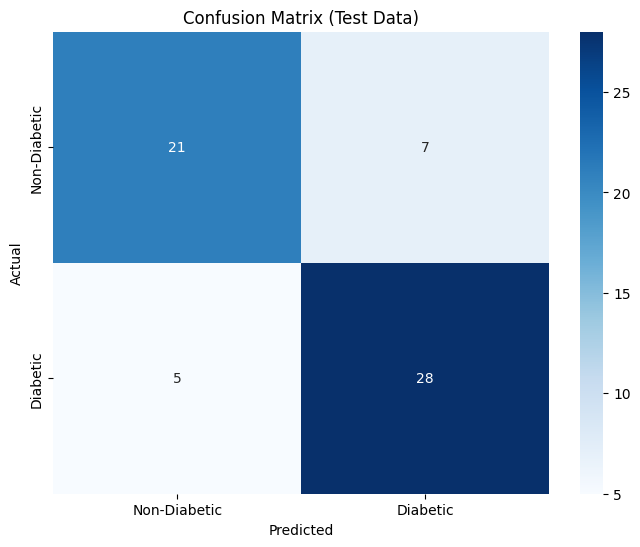

In [ ]:
final_model.fit(x_train, y_train)
metrics = evaluate_model(final_model, x_train, y_train, x_test, y_test)

# saving the model

In [ ]:
import pickle

In [ ]:
filename = 'heart_disease_model.sav'
pickle.dump(final_model,open(filename,'wb'))

In [ ]:
loaded_model = pickle.load(open('heart_disease_model.sav','rb'))

Building a predictive system

In [ ]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = final_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease
